# Lesson 1.6. Reference 1
# UML Class Diagrams for the Common Information Model

This resource contains a complete list of UML Class Diagrams for all of the objects used in GridAPPS-D to describe common power systems equipment, data, and messages.

---
# Table of Contents

* [1. Feeder Context](#1.-Feeder-Context)
    * [1.1. Class Diagram](#1.1.-Class-Diagram)
    * [1.2. Modeling Notes](#1.2.-Modeling-Notes)
    * [1.3. Table of Attributes](#1.3.-Table-of-Attributes)
    * [1.4. SPARQL Query Format](#1.4.-SPARQL-Query-Format)
    * [1.5. Sample Equipment Definition](#1.5.-Sample-Equipment-Definition)
* [2. Line Model](#1.-Line-Model)
    * [2.1. Class Diagram](#2.1.-Class-Diagram)
    * [2.2. Modeling Notes](#2.2.-Modeling-Notes)
    * [2.3. Table of Attributes](#2.3.-Table-of-Attributes)
    * [2.4. SPARQL Query Format](#2.4.-SPARQL-Query-Format)
    * [2.5. Sample Equipment Definition](#2.5.-Sample-Equipment-Definition)

    
    

# 1. Feeder Context

The Feeder Context diagram shows how equipment is organized into a Feeder. Each piece of __Equipment__ has __Terminals__ that connect at __ConnectivityNodes__, which represent the “buses”. Please note that in GridAPPS-D, we do not use __TopologicalNode__ at all. In some CIM use cases, primary for transmission, the __TopologicalNode__ coalesces __ConnectivityNodes__ that are connected by buswork and closed switches into a single connection point. Instead, substation buswork models need to explicitly include the low-impedance branches and switches between ConnectivityNodes. We assume that modern distribution power flow solvers have no need of __TopologicalNode__.

## 1.1. Class Diagram

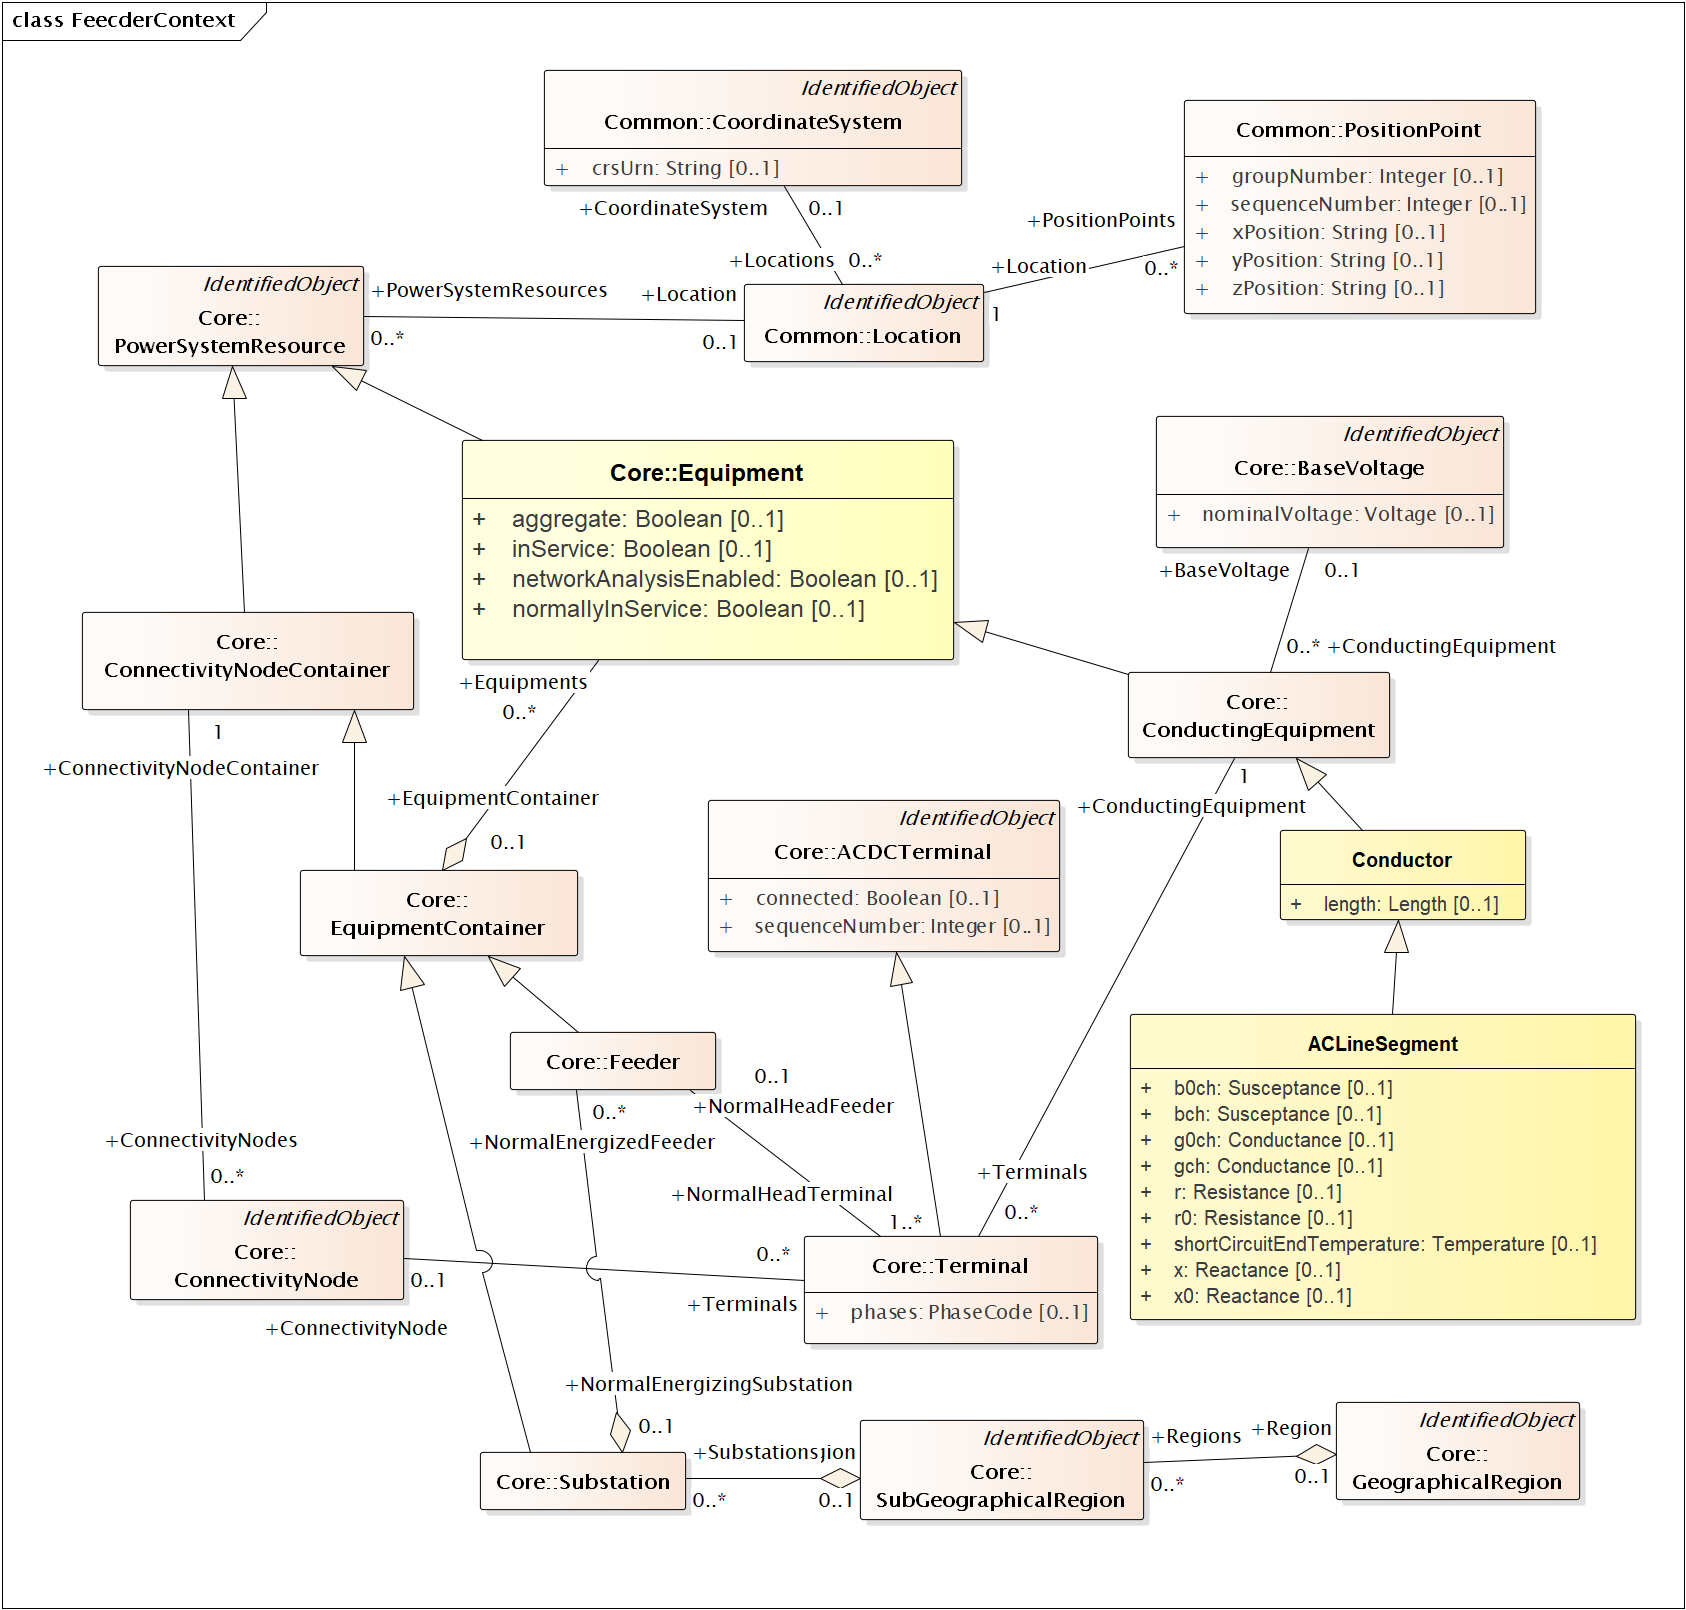

## 1.2. Modeling Notes

_Placement of __ACLineSegment__ into a __Feeder__:_

In GridAPPS-D, the Feeder is the __EquipmentContainer__ for all power system components and the __ConnectivityNodeContainer__ for all nodes. It is energized from a __Substation__, which is part of a __SubGeographicalRegion__ and __GeographicalRegion__ for proper context with other CIM models. For visualization, __ACLineSegment__ can be drawn from a sequence of __PositionPoints__ associated via __Location__. The __Terminals__ are free-standing; two of them will “reverse-associate” to the __ACLineSegment__ as __ConductingEquipment__, and each terminal also has one __ConnectivityNode__. The __Terminal:phases__ attribute is not used; instead, phases will be defined in the __ConductingEquipment__ instances. The associated __BaseVoltage:nominalVoltage__ attribute is important for many of the classes that do not have their own rated voltage attributes, for example, __EnergyConsumer__.

# 1.3. Table of Attributes



# 1.4. Sample SPARQL Queries



---
# 2. Line Model

The __LineModel__ class diagram describes all of the objects related to overhead power lines and underground cables, as well as their attributes. 

In CIM, the impedance parameters of __ACLineSegment__ can be defined by 1) resistance/reactance, 2) sequence impedance, 3) phase impedance, and 4) wire/cable geometry.



## 2.1. Class Diagram

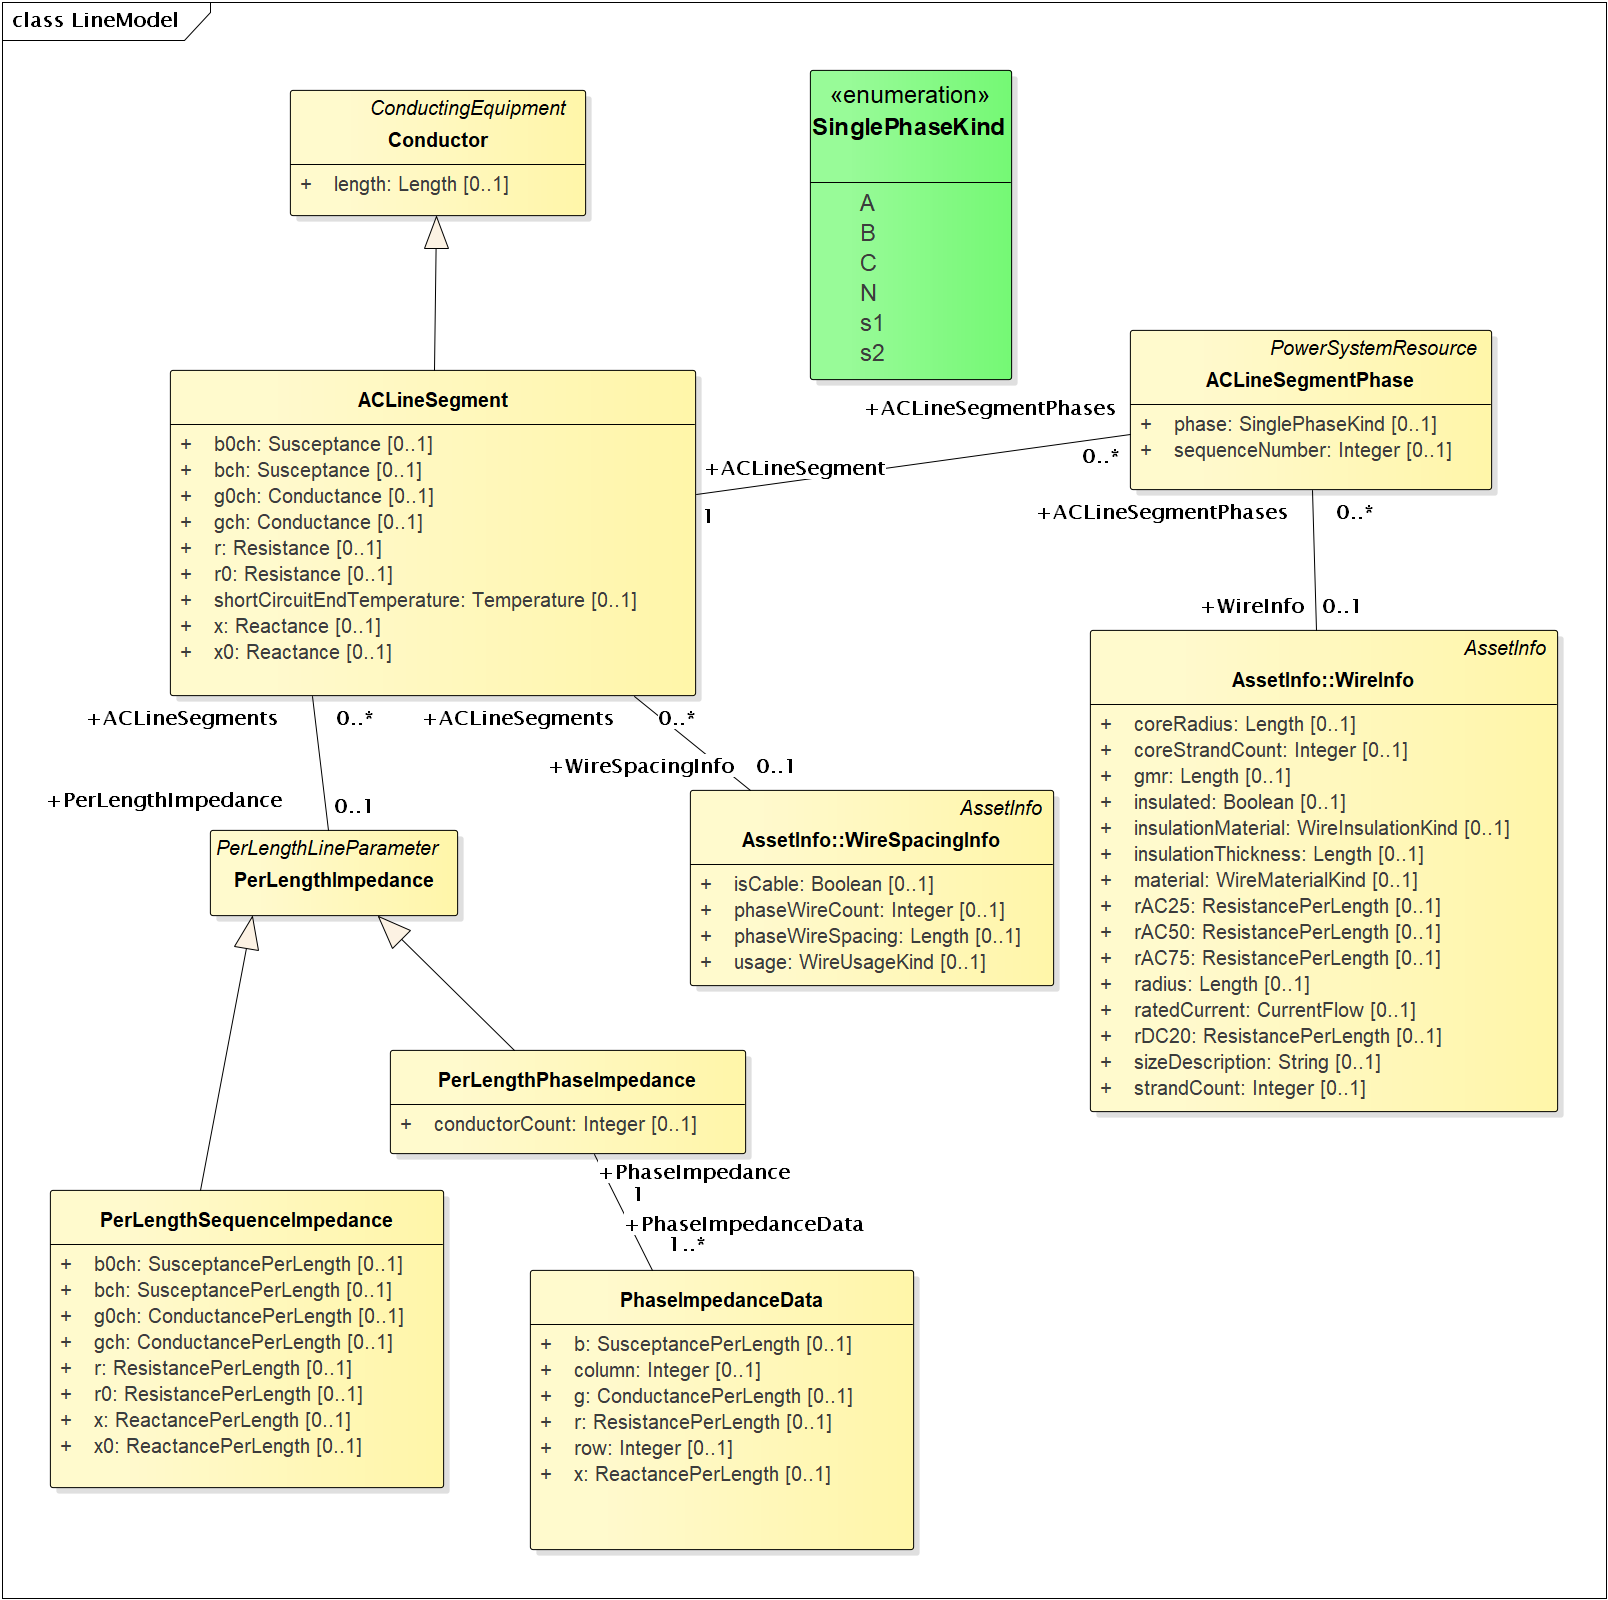

## 2.2. Modeling Notes

There are four different ways to specify __ACLineSegment__ impedances. In all cases, __Conductor:length__ is required.

The first way is to specify the individual __ACLineSegment__ attributes, which are sequence impedances and admittances, leaving __PerLengthImpedance__ null. 

The second way is to specify the same attributes on an associated __PerLengthSequenceImpedance__, in which case the __ACLineSegment__ attributes should be null. 

The third way is to associate a __PerLengthPhaseImpedance__, leaving the __ACLineSegment__ attributes null. Only __conductorCount__ from 1 to 3 is supported, and there will be 1, 3 or 6 reverse-associated __PhaseImpedanceData__ instances that define the lower triangle of the Z and Y matrices per unit length. The row and column attributes must agree with __ACLineSegmentPhase:sequenceNumber__. 

The fourth way to specify impedance is by wire/cable and spacing data, by association to __WireSpacingInfo__ and __WireInfo__. If there are __ACLineSegmentPhase__ instances reverse-associated to the __ACLineSegment__, then per-phase modeling applies. There are several use cases for __ACLineSegmentPhase__: 1) single-phase or two-phase primary, 2) low-voltage secondary using phases s1 and s2, 3) associated __WireInfo__ data where the __WireSpacingInfo__ association exists, 4) assign specific phases to the matrix rows and columns in __PerLengthPhaseImpedance__. It is the application’s responsibility to propagate phasing through terminals to other components, and to identify any miswiring. (Note: this profile does not use __WireAssemblyInfo__, nor the __fromPhase__ and __toPhase__ attributes of __PhaseImpedanceData__.)

## 2.3. Table of Attributes



## 2.4. SPARQL Query Format



---
# 3. Switching Equipment

## 3.1. Class Diagram

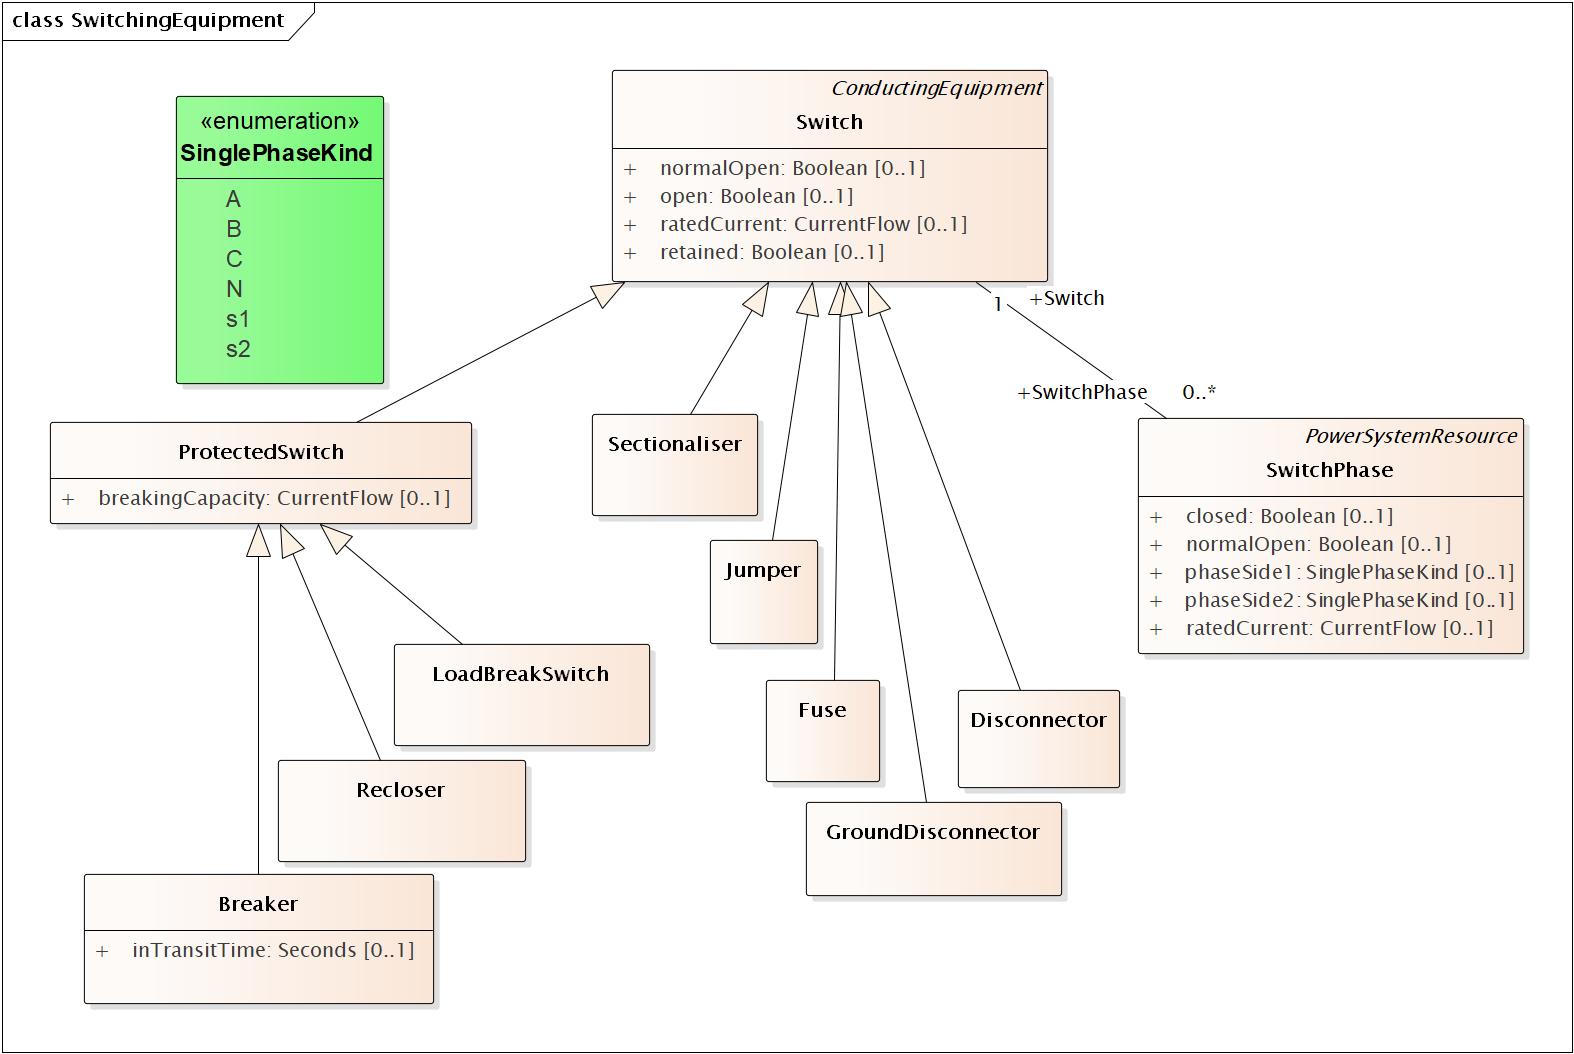

---
# 4. Loads and Sources



## 4.1. Class Diagram

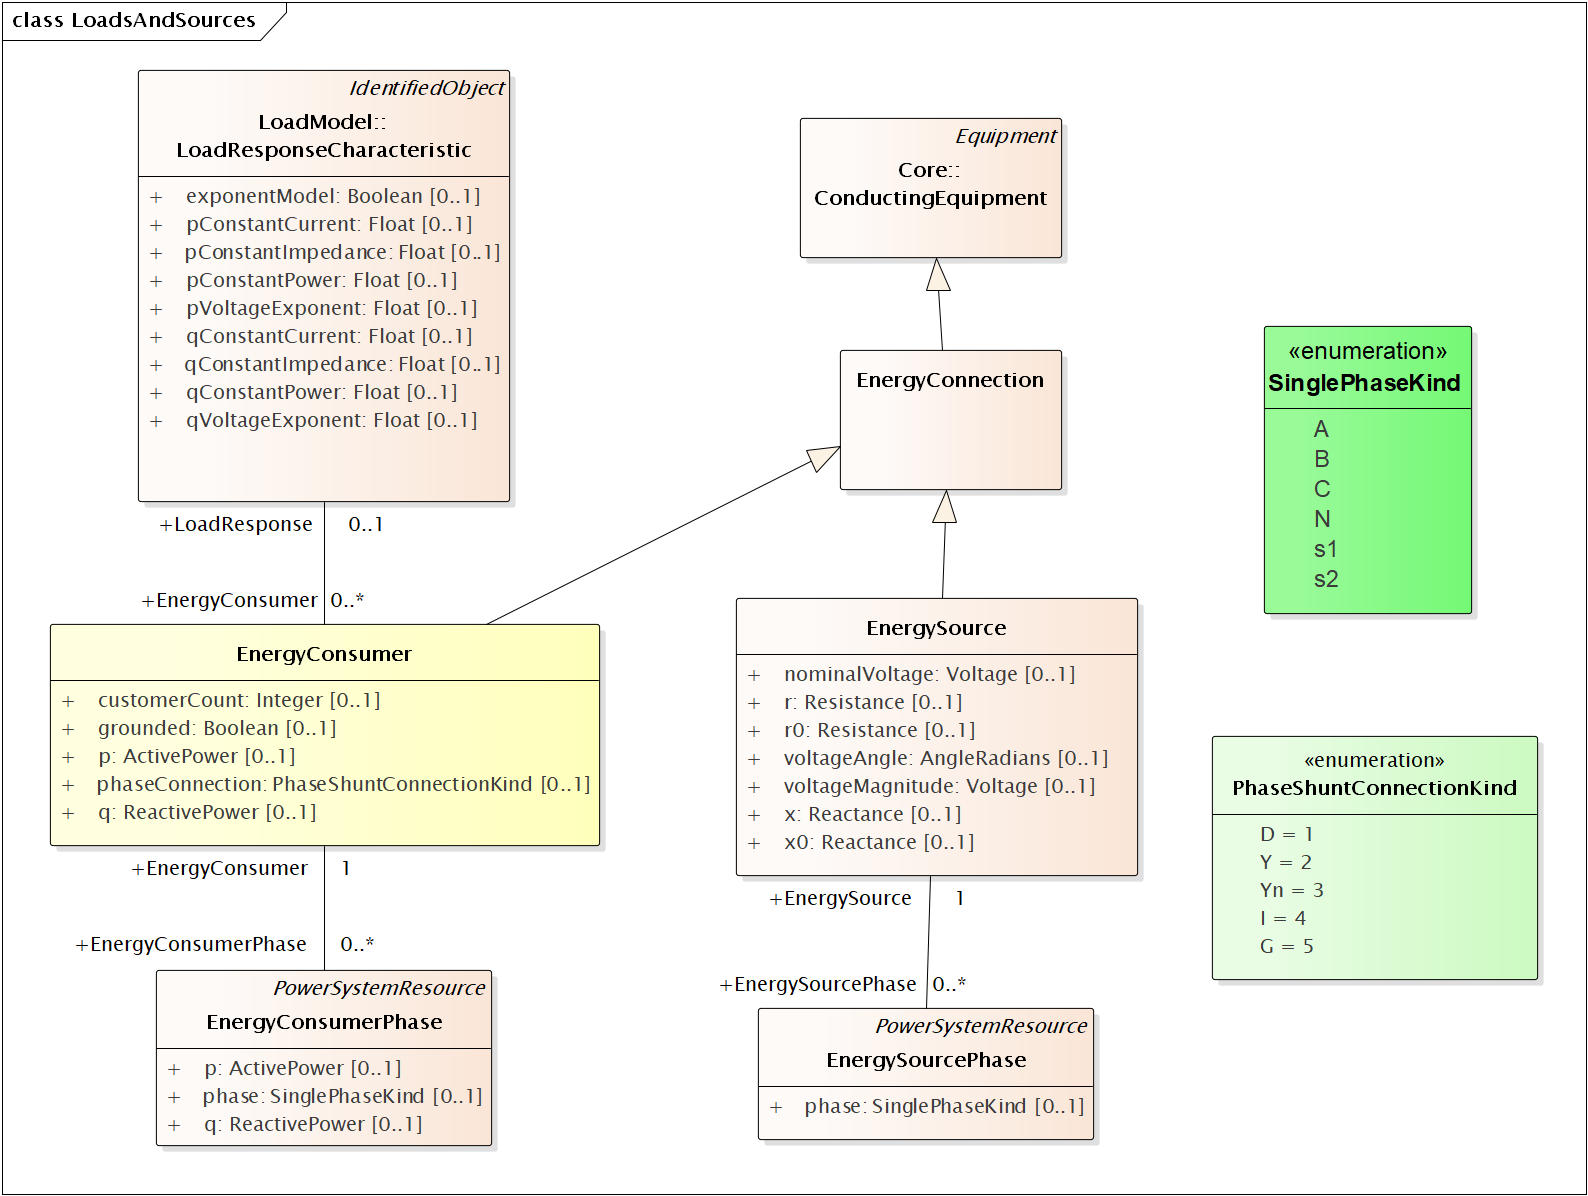

## 4.2. Modeling Notes

